<a href="https://colab.research.google.com/github/SuperChini/Brief-sample/blob/main/Data_Analysis_Meeting_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ///////////////////////  MARKET EXAMPLE CASE  ///////////////////////


In [1]:
import math
import warnings
import numpy as np
import scipy.stats
import pandas as pd
import scipy as spy
import random as rd
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

from collections import deque
from scipy.stats import linregress
from scipy.interpolate import interp1d
from scipy.interpolate import pchip_interpolate
from scipy.ndimage.filters import gaussian_filter1d
from scipy.stats import pearsonr, spearmanr, kendalltau
from scipy.interpolate import make_interp_spline, BSpline


#Dataframe columns generation

In [8]:
#SELL-IN PRICES
prices_si = [rd.uniform(2730, 77580) for _ in range(500)]
rounded_prices_si = np.round(prices_si,2)
rounded_prices_si = list(rounded_prices_si)

rounded_prices_si[0:10]

[28542.59,
 49566.4,
 32844.38,
 38413.33,
 6278.23,
 68551.09,
 26252.32,
 65555.92,
 53815.43,
 32564.96]

https://medium.com/@andrea_faria/using-pandas-cut-in-python-for-data-analysis-creating-number-and-date-intervals-b558d23cdf4#:~:text=cut()%3F-,Python%20pandas.,number%20of%20evenly%20spaced%20intervals.

In [41]:
# DEVICE CATEGORY GENERATION

#So as to assign reasonable prices to the products in each category

prices = pd.Series(rounded_prices_si)

category_prices = [2000, 5000, 15000, 29000, 53000, 80000]

categories = pd.cut(prices, category_prices, labels = ['Mobile', 'Motorcycle', 'Car', 'Sailboat', 'Yacht'])

categories[200:210]

,0
200,Yacht
201,Sailboat
202,Car
203,Car
204,Sailboat
205,Car
206,Sailboat
207,Yacht
208,Yacht
209,Sailboat


In [9]:
#SELL-IN PRICES SHIFTED CODE - OUTDATED SELL-IN PRICE

rotated_prices_si_SHIFTED_CODE = np.array(prices_si) #turn into array the list
rotated_prices_si_SHIFTED_CODE = list(np.roll(rotated_prices_si_SHIFTED_CODE, -1)) # shift the array positions and converted again into list


rotated_prices_si_SHIFTED_CODE = list([x*(1 + 0.045* np.cos(x*2*np.pi/10**5)) for x in rotated_prices_si_SHIFTED_CODE]) #shifted and scaled list
rounded_rotated_prices_si_SHIFTED_CODE = np.round(rotated_prices_si_SHIFTED_CODE, 2) #rounded list
rounded_rotated_prices_si_SHIFTED_CODE[0:10]


array([47336.74, 32145.04, 37122.93,  6539.05, 67335.06, 26159.46,
       63906.34, 51463.  , 31894.35, 60715.35])

In [17]:
#SELL-OUT PRICES

prices_so = list([x * (1 + 0.15*(np.sin(x*2*np.pi/(8*10**4)))**2) for x in rounded_prices_si])
rounded_prices_so = np.round(prices_so, 2)

print('Sell-In Prices')
print(rounded_prices_si[400:500])
print(np.mean(rounded_prices_si))
print('\n')

print('Sell-Out Prices')
print(list(rounded_prices_so[400:500]))
print(np.mean(list(rounded_prices_so)))
print('\n')

Sell-In Prices
[62728.5, 58102.17, 5653.05, 24362.46, 76707.68, 9829.6, 7447.7, 41379.63, 49422.94, 75616.83, 50715.63, 55396.65, 31106.25, 40871.53, 52982.26, 32318.65, 20706.25, 55999.59, 53060.35, 39983.75, 20841.25, 53217.63, 8427.36, 77139.84, 59342.7, 24850.77, 48327.84, 6328.86, 32077.64, 47354.44, 32932.96, 41161.64, 58758.04, 75200.08, 27397.17, 8730.11, 16767.02, 36590.92, 20157.76, 58968.57, 62930.29, 53620.6, 54237.5, 24221.9, 48852.26, 24837.85, 7647.81, 71140.67, 19050.82, 19418.65, 43518.84, 54544.91, 7523.42, 10997.72, 15894.28, 4880.59, 16078.04, 55732.48, 44213.27, 22932.77, 58768.07, 27291.26, 47301.51, 47221.66, 48365.06, 17623.77, 28295.31, 28818.1, 48865.54, 7047.97, 61658.5, 37645.23, 9913.14, 29173.11, 59564.88, 49044.39, 24736.99, 61568.85, 73199.15, 25049.71, 22970.44, 29617.06, 57738.75, 34441.97, 51259.01, 37542.54, 52903.66, 49206.2, 58477.21, 43616.11, 30019.41, 40155.66, 15774.56, 17262.12, 10369.68, 54172.89, 58684.6, 41759.63, 8288.94, 61188.63]
38382.6

In [22]:
#PURCHASED UNITS
purchased_units = [np.ceil(5*10**5/x*((np.sin(8*10**4/x))**2)) for x in rounded_prices_so]
purchased_units = np.round(purchased_units, 2)
purchased_units = list(purchased_units)
purchased_units[0:10]

[5.0, 10.0, 8.0, 10.0, 5.0, 6.0, 3.0, 6.0, 8.0, 8.0]

In [23]:
#WEIGHT
sorted_categories = sorted(categories)


for y in sorted_categories:
 weights = [rd.uniform(0.08, 2) for _ in range(500)]
 weights = np.round(weights, 1)
 weights = list(weights)

#Dataframe building


In [42]:
content_df = pd.DataFrame()

content_df['Category'] = categories
content_df['PRICES SELL-IN SHIFT CODE [USD]'] = rounded_rotated_prices_si_SHIFTED_CODE
content_df['PRICES SELL-IN [USD]'] = rounded_prices_si
content_df['PRICES SELL-OUT [USD]'] = rounded_prices_so
content_df['PURCH. UNITS'] = purchased_units
content_df['WEIGHT [Tons]'] = weights
content_df.head(20)

,Category,PRICES SELL-IN SHIFT CODE [USD],PRICES SELL-IN [USD],PRICES SELL-OUT [USD],PURCH. UNITS,WEIGHT [Kg]
0,Car,47336.74,28542.59,31169.08,5.0,0.9
1,Sailboat,32145.04,49566.40,53030.88,10.0,1.2
2,Sailboat,37122.93,32844.38,34243.36,8.0,0.4
3,Sailboat,6539.05,38413.33,38502.35,10.0,1.4
4,Motorcycle,67335.06,6278.23,6489.24,5.0,0.2
5,Yacht,26159.46,68551.09,74852.48,6.0,0.6
6,Car,63906.34,26252.32,29314.52,3.0,1.1
7,Yacht,51463.00,65555.92,73632.79,6.0,0.1
8,Yacht,31894.35,53815.43,60128.33,8.0,1.1
9,Sailboat,60715.35,32564.96,34049.70,8.0,1.1


In [43]:
content_df.describe()

,PRICES SELL-IN SHIFT CODE [USD],PRICES SELL-IN [USD],PRICES SELL-OUT [USD],PURCH. UNITS,WEIGHT [Kg]
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,37559.430800,38382.634780,41568.112840,11.506000,1.007400
std,20347.213401,21008.355039,22781.589116,14.988237,0.576637
min,3192.770000,3057.710000,3083.660000,1.000000,0.100000
25%,21045.080000,20800.972500,23908.787500,6.000000,0.500000
50%,35133.995000,36186.620000,36659.170000,8.000000,1.000000
75%,53538.837500,55883.685000,63420.047500,11.000000,1.500000
max,77942.630000,77415.850000,77887.660000,146.000000,2.000000


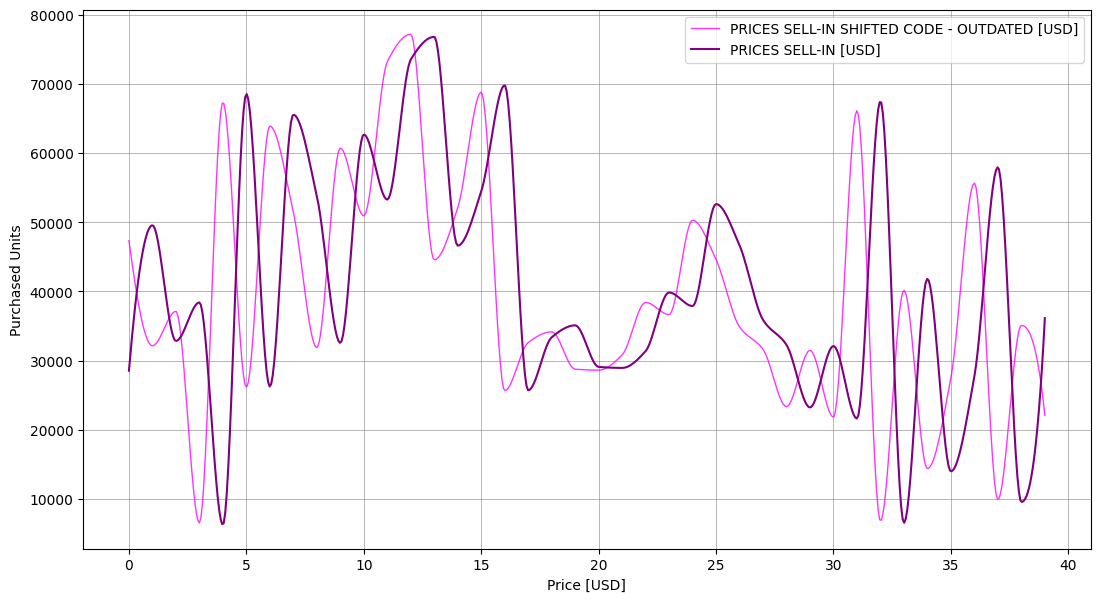

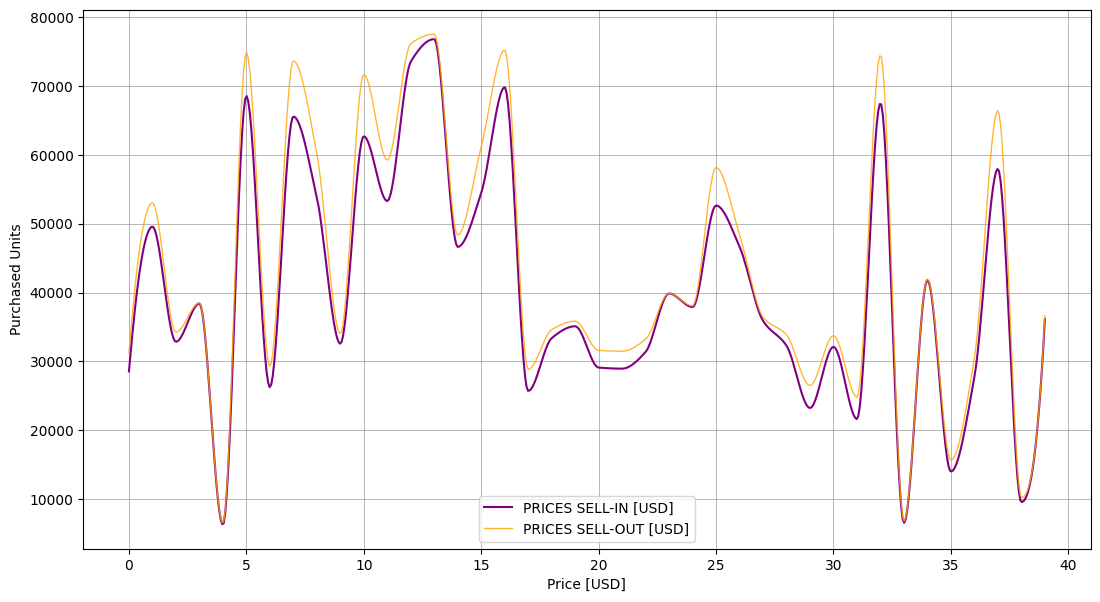

In [26]:
#SELL-IN and SELL-OUT PRICES PLOTS

Short_df = content_df.iloc[0:40]

X = np.linspace(Short_df.index.min(), Short_df.index.max(), 600)

Y_SI_prev_month = pchip_interpolate(Short_df.index, Short_df['PRICES SELL-IN SHIFT CODE [USD]'], X)
Y_SI = pchip_interpolate(Short_df.index, Short_df['PRICES SELL-IN [USD]'], X)
Y_SO = pchip_interpolate(Short_df.index, Short_df['PRICES SELL-OUT [USD]'], X)



plt.figure(figsize=(13, 7))  # for sizing the figure

plt.plot(X, Y_SI_prev_month, color = 'magenta', label = "PRICES SELL-IN SHIFTED CODE - OUTDATED [USD]", linewidth = 1, alpha = 0.8)
plt.plot(X, Y_SI, color = 'purple', label = "PRICES SELL-IN [USD]")
#plt.plot(X, Y_SO, color = 'orange', label = "PRICES SELL-OUT [USD]", linewidth = 1, alpha = 0.8)

plt.legend()
plt.xlabel('Price [USD]')
plt.ylabel('Purchased Units')
plt.grid(True, color = "grey", linewidth = "0.4", linestyle = "-")
plt.show()


plt.figure(figsize=(13, 7))  # for sizing the figure

#plt.plot(X, Y_SI_prev_month, color = 'magenta', label = "PRICES SELL-IN SHIFT CODE [USD]", linewidth = 1, alpha = 0.8)
plt.plot(X, Y_SI, color = 'purple', label = "PRICES SELL-IN [USD]")
plt.plot(X, Y_SO, color = 'orange', label = "PRICES SELL-OUT [USD]", linewidth = 1, alpha = 0.8)

plt.legend()
plt.xlabel('Price [USD]')
plt.ylabel('Purchased Units')
plt.grid(True, color = "grey", linewidth = "0.4", linestyle = "-")
plt.show()


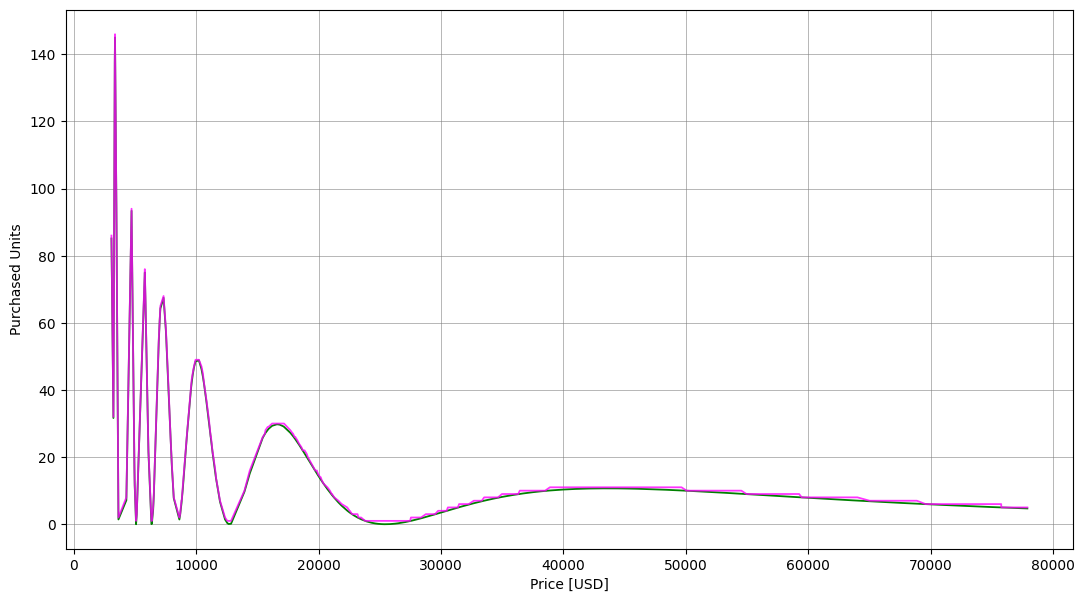

In [29]:
#DOING THIS SO AS TO SEE THE PLOT IN A CONTINUOUS WAY, AND NOT LADDER LIKE PLOT DUE TO THE DISCRETE PURCHASED UNITS
Plot_df = content_df.copy()

Y_plot_purchased_units = [(5*10**5/x*((np.sin(8*10**4/x))**2)) for x in rounded_prices_so]
purchased_so_units = Plot_df['PURCH. UNITS']


Plot_df['continuous_purchased_units'] = Y_plot_purchased_units
Plot_df['ceil_purchased_units'] = purchased_so_units

Plot_df = Plot_df.sort_values('PRICES SELL-OUT [USD]') # THE SORTING PROCESS IS NECESSARY SO AS TO SEE COHERENT PLOT


plt.figure(figsize=(13, 7))  # for sizing the figure

plt.plot(Plot_df['PRICES SELL-OUT [USD]'], Plot_df['continuous_purchased_units'], color = 'green',label = "Price vs Purchased Units", linewidth = 1.3)
plt.plot(Plot_df['PRICES SELL-OUT [USD]'], Plot_df['ceil_purchased_units'], color = 'magenta', label = "Price vs Purchased Units", linewidth = 1.3, alpha = 0.8)

plt.xlabel('Price [USD]')
plt.ylabel('Purchased Units')
plt.grid(True, color = "grey", linewidth = "0.4", linestyle = "-")
plt.show()

In [35]:
(Plot_df['continuous_purchased_units'] <= 0.025).sum()

4

In [36]:
content_df.describe()

,PRICES SELL-IN SHIFT CODE [USD],PRICES SELL-IN [USD],PRICES SELL-OUT [USD],PURCH. UNITS,WEIGHT [Kg]
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,37559.430800,38382.634780,41568.112840,11.506000,1.007400
std,20347.213401,21008.355039,22781.589116,14.988237,0.576637
min,3192.770000,3057.710000,3083.660000,1.000000,0.100000
25%,21045.080000,20800.972500,23908.787500,6.000000,0.500000
50%,35133.995000,36186.620000,36659.170000,8.000000,1.000000
75%,53538.837500,55883.685000,63420.047500,11.000000,1.500000
max,77942.630000,77415.850000,77887.660000,146.000000,2.000000


In [37]:
content_df.columns

Index(['PRICES SELL-IN SHIFT CODE [USD]', 'PRICES SELL-IN [USD]',
       'PRICES SELL-OUT [USD]', 'PURCH. UNITS', 'WEIGHT [Kg]'],
      dtype='object')

https://sustainabilitymethods.org/index.php/Exploring_Different_Correlation_Coefficients_and_Plotting_Correlations_in_Python

https://seaborn.pydata.org/generated/seaborn.pairplot.html

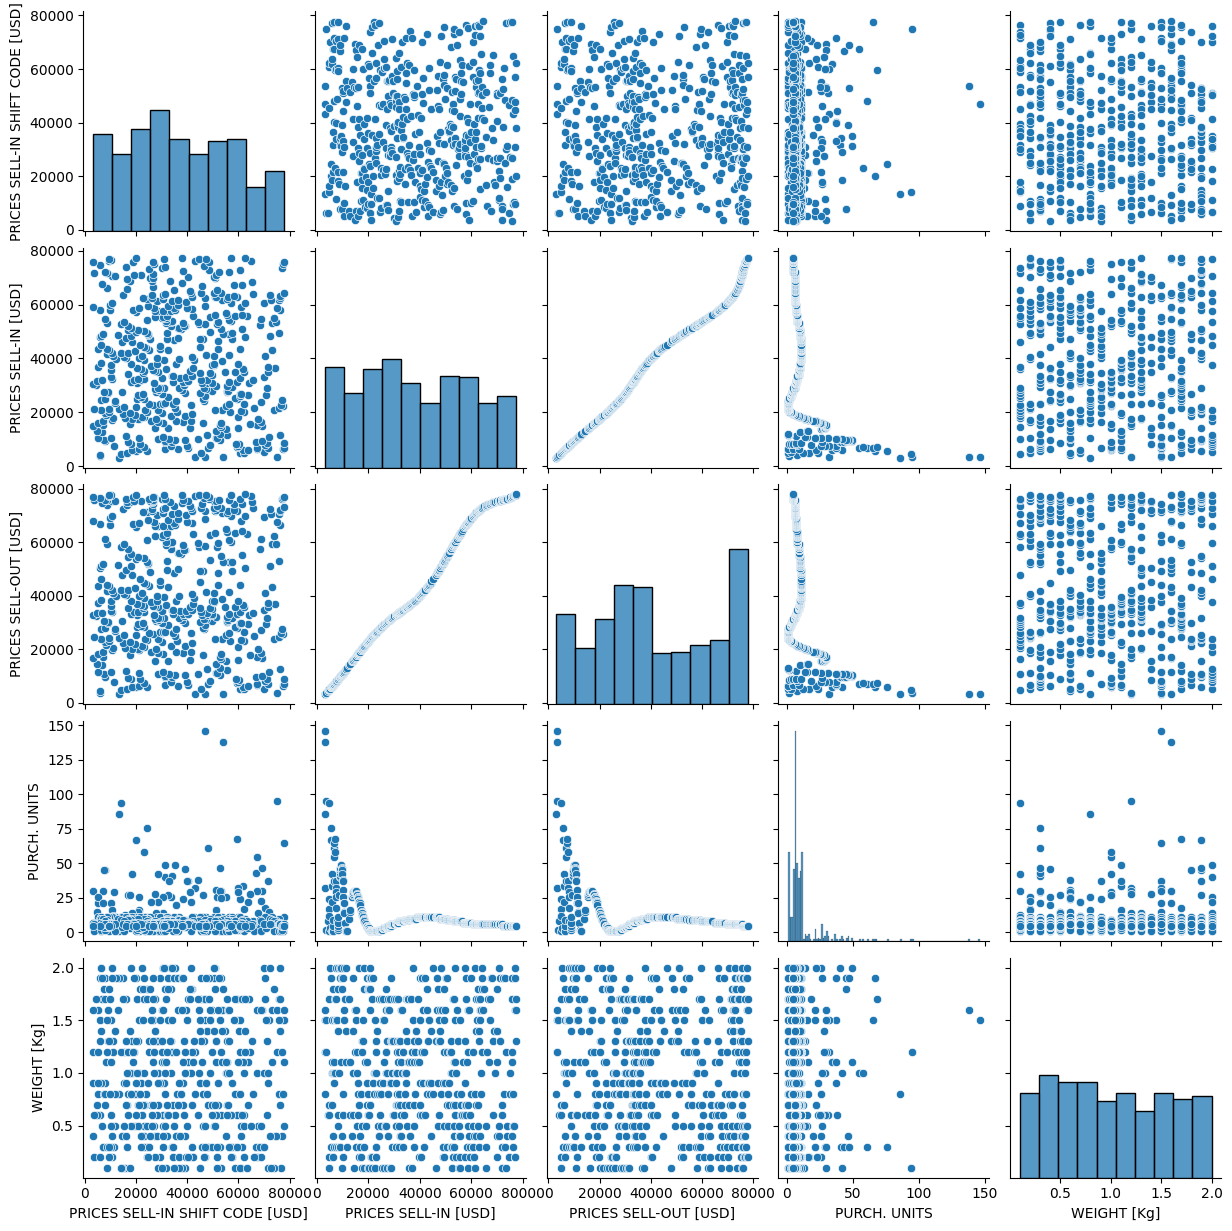

In [44]:
# Plot the scatterplot matrix for selected variables
sns.pairplot(content_df.sort_values('PRICES SELL-IN [USD]'), vars=['PRICES SELL-IN SHIFT CODE [USD]', 'PRICES SELL-IN [USD]',
       'PRICES SELL-OUT [USD]', 'PURCH. UNITS', 'WEIGHT [Kg]'])

In [39]:
# When reading the SEABORN library, just to see which are the variables in this dataset
penguins = sns.load_dataset("penguins")
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [40]:
penguins['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

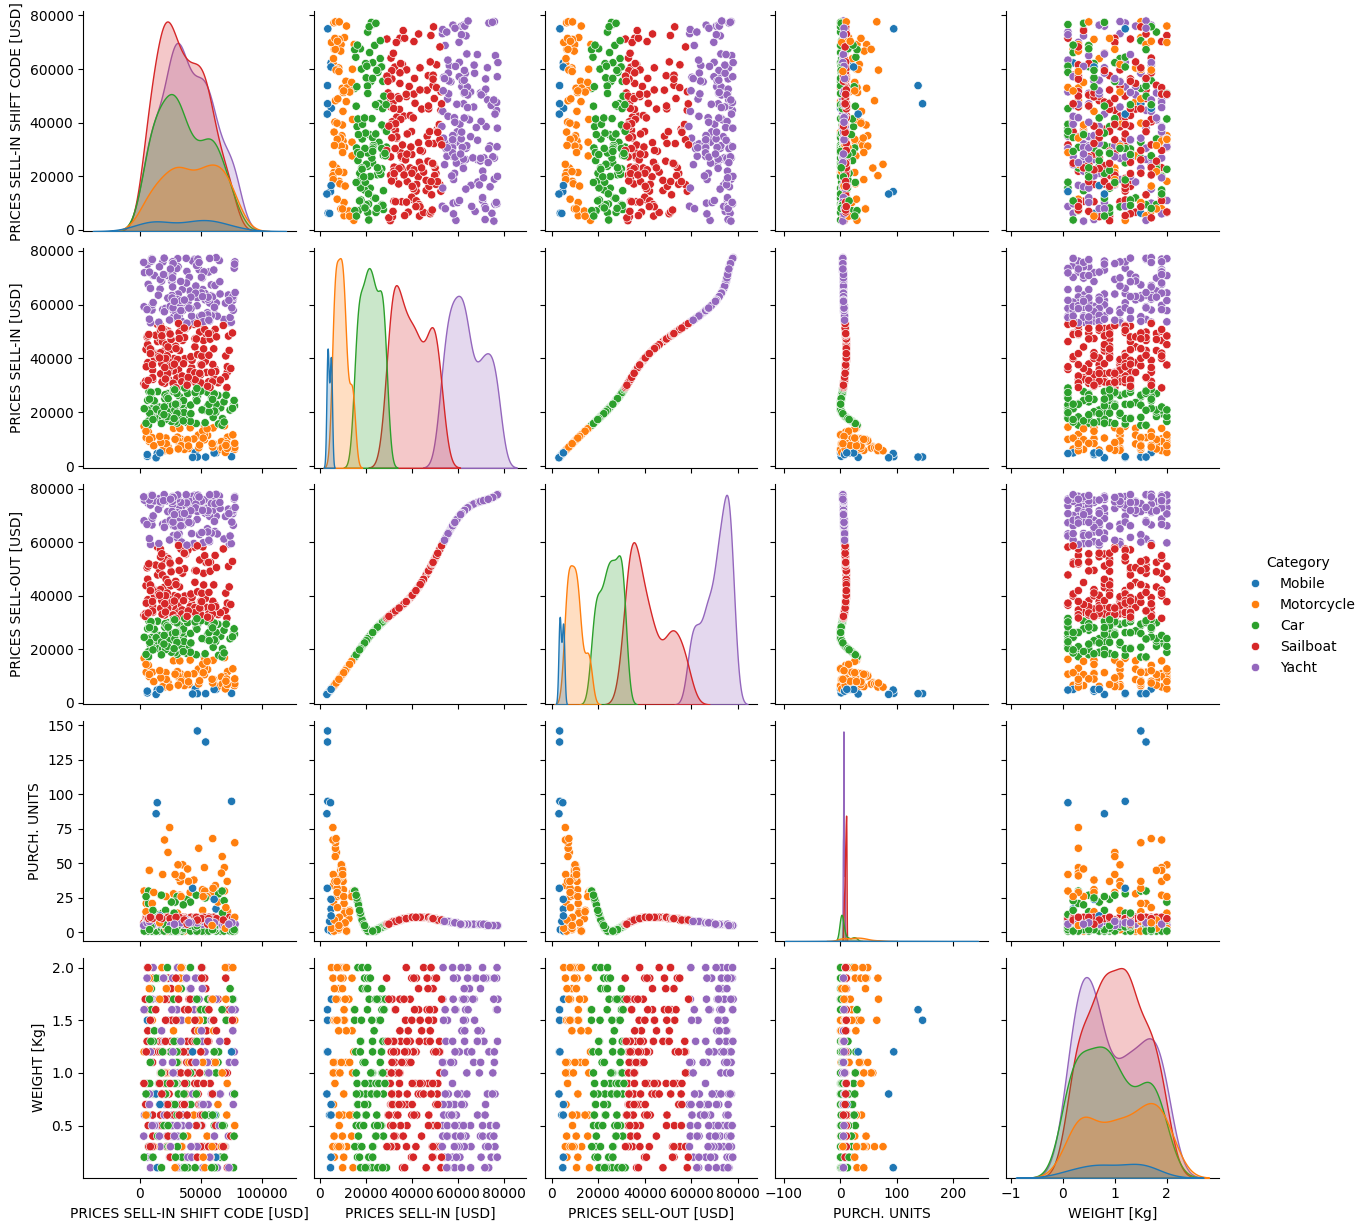

In [46]:
sns.pairplot(content_df, hue="Category")

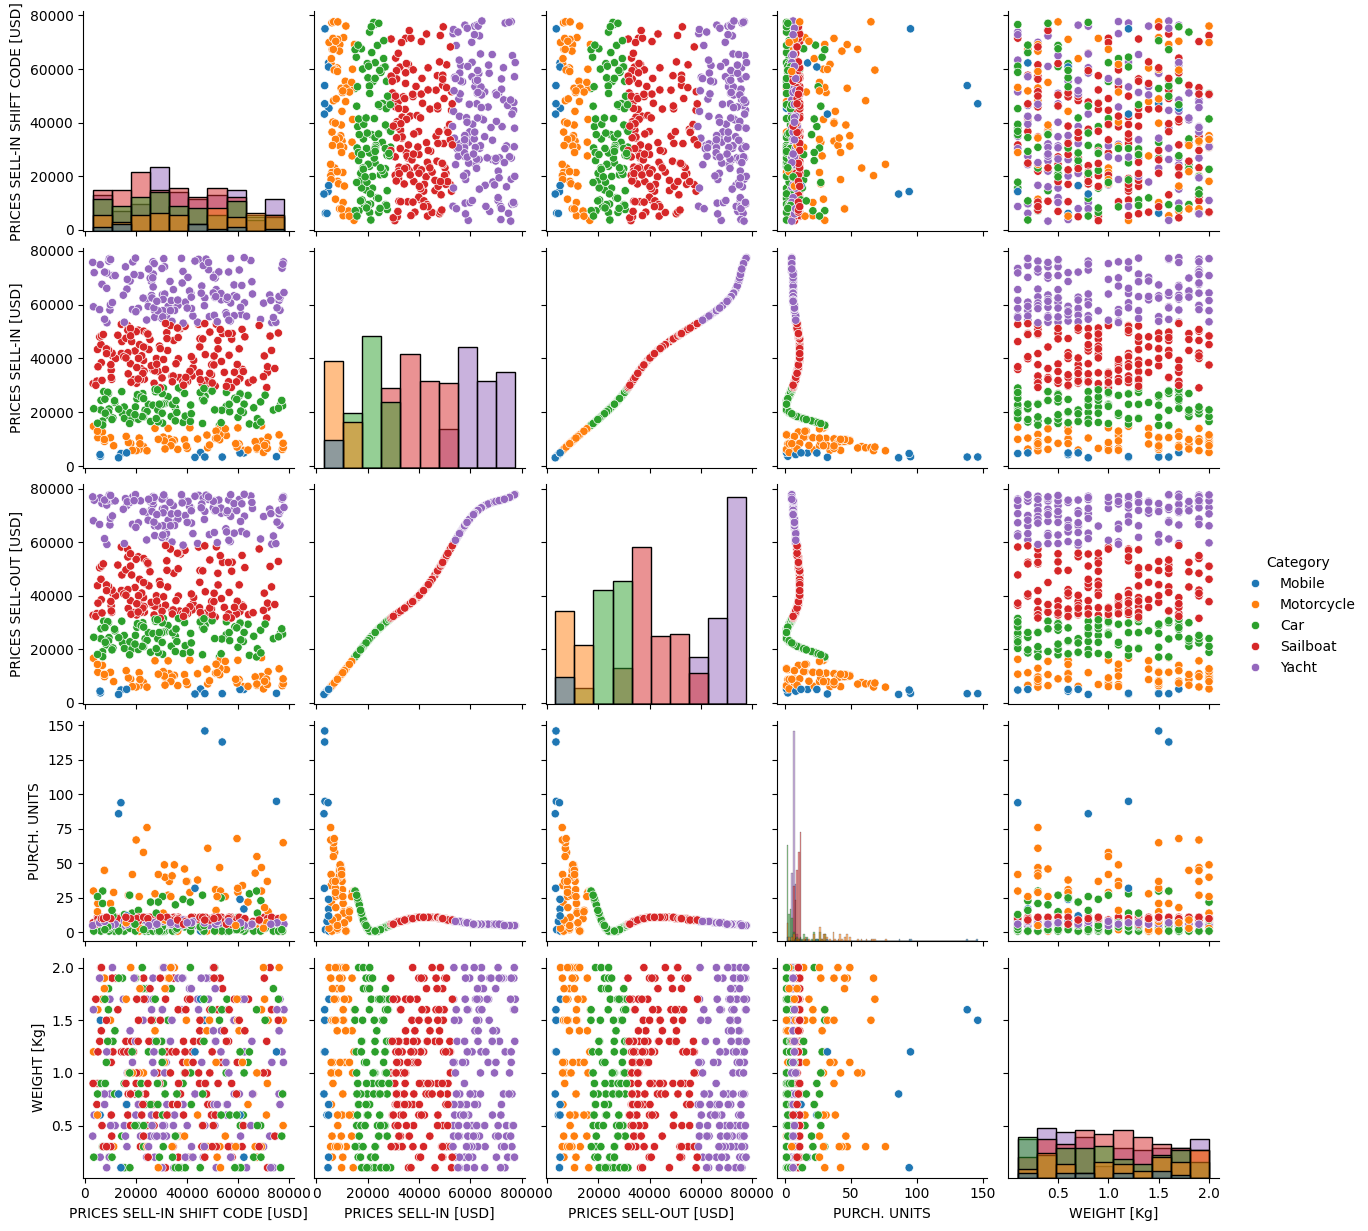

In [47]:
sns.pairplot(content_df, hue="Category", diag_kind="hist")

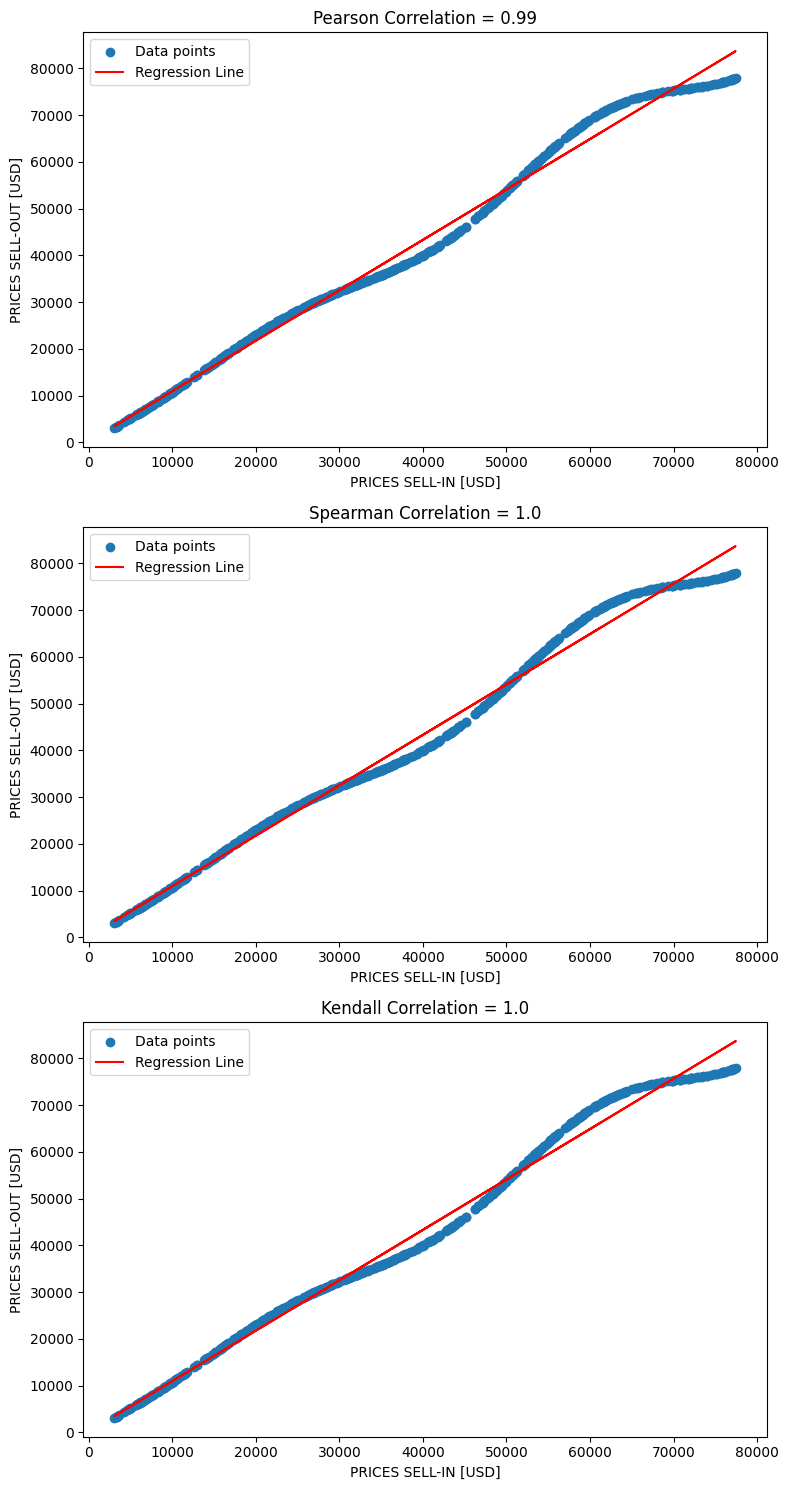

In [51]:
# Create subplots: 3 rows, 1 column
fig, axes = plt.subplots(3, 1, figsize=(8, 15))

# List of correlation methods
correlations = {
    "Pearson": scipy.stats.pearsonr,
    "Spearman": scipy.stats.spearmanr,
    "Kendall": scipy.stats.kendalltau
}

# Loop over each correlation type
for i, (corr_name, corr_func) in enumerate(correlations.items()):
    ax = axes[i]  # Select the subplot

    # Scatter plot
    ax.scatter(content_df['PRICES SELL-IN [USD]'], content_df['PRICES SELL-OUT [USD]'], label="Data points")

    # Linear Regression (only valid for Pearson, but we still show it for reference)
    slope, intercept, _, _, _ = linregress(content_df['PRICES SELL-IN [USD]'], content_df['PRICES SELL-OUT [USD]'])
    regression_line = slope * content_df['PRICES SELL-IN [USD]'] + intercept

    # Plot regression line
    ax.plot(content_df['PRICES SELL-IN [USD]'], regression_line, color='red', label="Regression Line")

    # Compute correlation coefficient
    correlation_value = round(corr_func(content_df['PRICES SELL-IN [USD]'], content_df['PRICES SELL-OUT [USD]'])[0], 2)

    # Set title
    ax.set_title(f'{corr_name} Correlation = {correlation_value}')

    # Set labels
    ax.set_xlabel('PRICES SELL-IN [USD]')
    ax.set_ylabel('PRICES SELL-OUT [USD]')
    ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()


#Pearson's Correlation

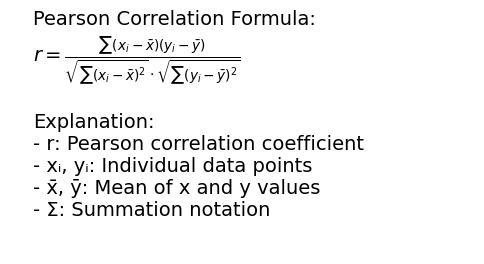

In [72]:
import matplotlib.pyplot as plt

# Pearson Correlation Formula & Explanation
pearson_text = (
    "Pearson Correlation Formula:\n"
    r"$r = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum (x_i - \bar{x})^2} \cdot \sqrt{\sum (y_i - \bar{y})^2}}$"
    "\n\n"
    "Explanation:\n"
    "- r: Pearson correlation coefficient\n"
    "- xᵢ, yᵢ: Individual data points\n"
    "- x̄, ȳ: Mean of x and y values\n"
    "- Σ: Summation notation"
)

# Create figure
fig, ax = plt.subplots(figsize=(6, 1))
ax.text(0.05, 0.5, pearson_text, fontsize=14, wrap=False)

ax.axis('off')

# Show plot
plt.show()


<Axes: >

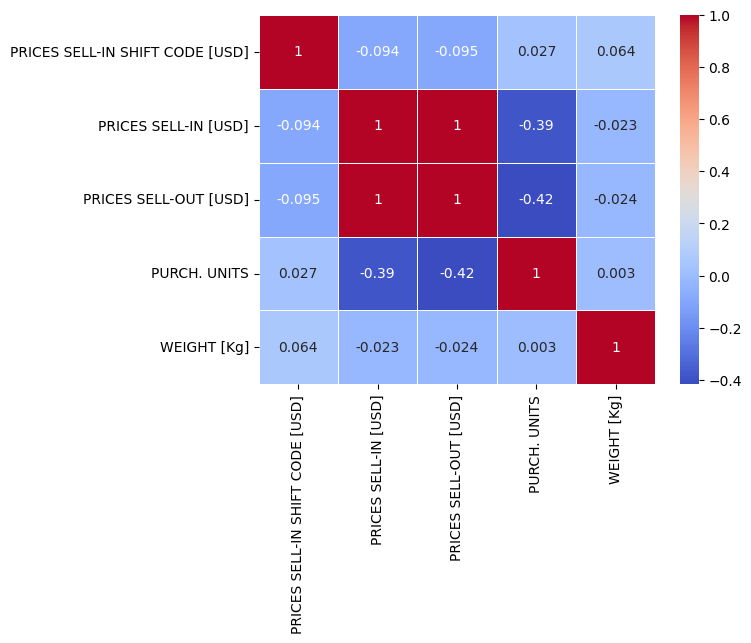

In [57]:
# Plot the heatmap according to the adjustments
sns.heatmap(content_df.corr(method = 'pearson', numeric_only=True), annot=True,cmap='coolwarm', linewidths=0.5)

#Spearman's Correlation


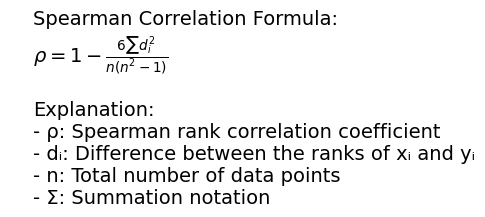

In [75]:
import matplotlib.pyplot as plt

# Spearman Correlation Formula & Explanation
spearman_text = (
    "Spearman Correlation Formula:\n"
    r"$\rho = 1 - \frac{6 \sum d_i^2}{n(n^2 - 1)}$"
    "\n\n"
    "Explanation:\n"
    "- ρ: Spearman rank correlation coefficient\n"
    "- dᵢ: Difference between the ranks of xᵢ and yᵢ\n"
    "- n: Total number of data points\n"
    "- Σ: Summation notation"
)

# Create figure
fig, ax = plt.subplots(figsize=(6, 1))
ax.text(0.05, 0.5, spearman_text, fontsize=14, va='center', wrap=True)
ax.axis('off')

# Show plot
plt.show()


<Axes: >

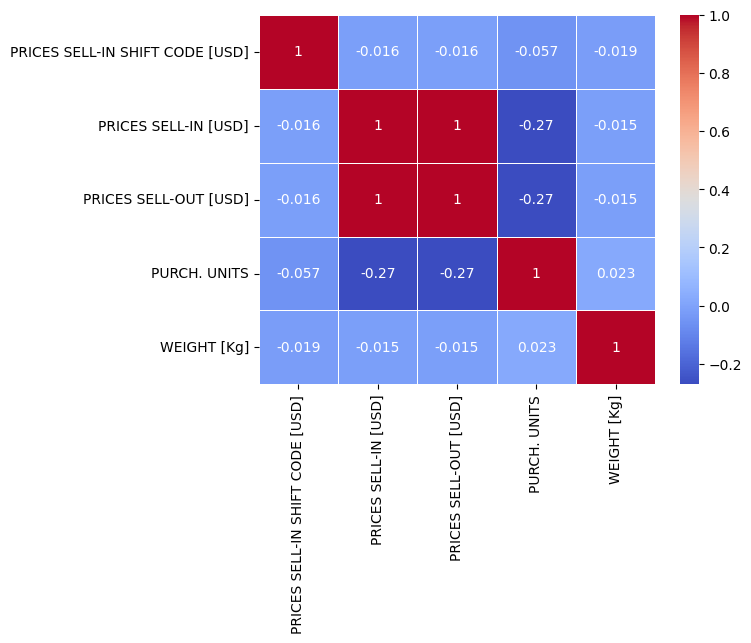

In [76]:
# Plot the heatmap according to the adjustments
sns.heatmap(content_df.corr(method = 'spearman', numeric_only=True), annot=True,cmap='coolwarm', linewidths=0.5)

#Kendall's Correlation

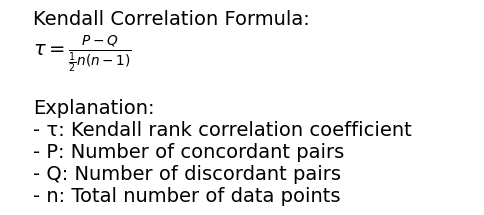

In [74]:
import matplotlib.pyplot as plt

# Kendall Correlation Formula & Explanation
kendall_text = (
    "Kendall Correlation Formula:\n"
    r"$\tau = \frac{P - Q}{\frac{1}{2} n (n-1)}$"
    "\n\n"
    "Explanation:\n"
    "- τ: Kendall rank correlation coefficient\n"
    "- P: Number of concordant pairs\n"
    "- Q: Number of discordant pairs\n"
    "- n: Total number of data points"
)

# Create figure
fig, ax = plt.subplots(figsize=(6, 1))
ax.text(0.05, 0.5, kendall_text, fontsize=14, va='center', wrap=True)
ax.axis('off')

# Show plot
plt.show()


<Axes: >

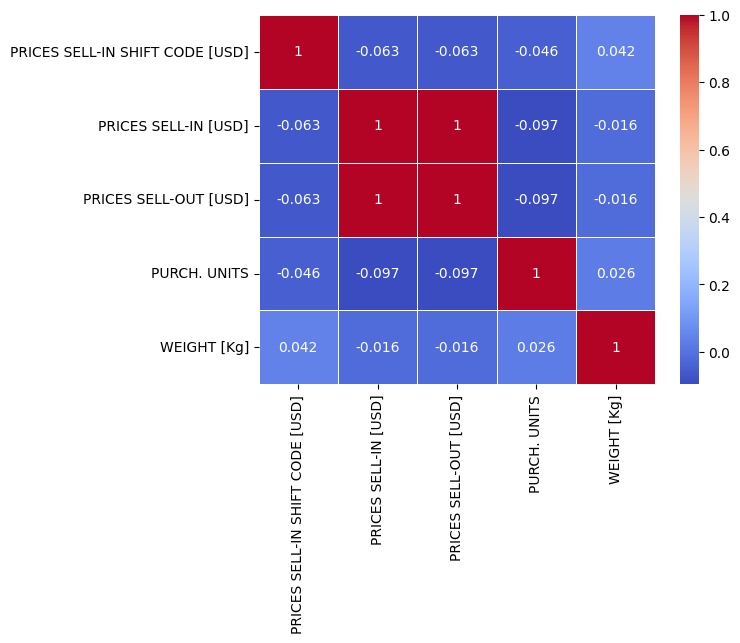

In [59]:
# Plot the heatmap according to the adjustments
sns.heatmap(content_df.corr(method = 'kendall', numeric_only=True), annot=True,cmap='coolwarm', linewidths=0.5)